# This Jupyter Notebook is to reproduce the Conclusion Plot provided in SOBR report. The input files are from output generated from the original SOBR Trend analysis Jupyter Notebook.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors
from shapely.geometry import Point

def load_data(file_path):
    df = pd.read_csv(file_path)
    return df[['Station', 'Latitude', 'Longitude', 'Trend Direction', 'Trend Significance']]

In [2]:
def plot_and_merge_data(file_paths, sobr_file_path, shapefile_path, title, output_csv_path='merged_data.csv'):
    # Load data from file paths
    result_dfs = [load_data(file_path) for file_path in file_paths]
    result_df70, result_df80, result_df90, result_df2020 = result_dfs

    # Load shapefile for base map
    base_map = gpd.read_file(shapefile_path)

    # Find common stations across all dataframes
    common_stations = set(result_df70['Station']).intersection(
        result_df80['Station'], result_df90['Station'], result_df2020['Station'])

    # Merge dataframes for common stations
    merged_df = pd.merge(result_df70[result_df70['Station'].isin(common_stations)], 
                         result_df80[result_df80['Station'].isin(common_stations)], 
                         on='Station', suffixes=('_70', '_80'))

    # Merge with the 1990 data
    merged_df = pd.merge(merged_df, result_df90[result_df90['Station'].isin(common_stations)], 
                         on='Station', suffixes=('_80', '_90'))

    # Merge with the 2020 data
    merged_df = pd.merge(merged_df, result_df2020[result_df2020['Station'].isin(common_stations)], 
                         on='Station', suffixes=('_90', '_2020'))

    # Initialize plot
    fig, ax = plt.subplots(figsize=(8, 8))
    colors = ['white', '#DAE8F9']
    cmap = matplotlib.colors.ListedColormap(colors)

    # Plot the map using the custom colormap
    base_map.plot(column="Id", cmap=cmap, legend=False, edgecolor='black', linewidth=0.05, ax=ax)

    # Plot the region boundaries for the entire map
    base_map.boundary.plot(ax=ax, linewidth=0.005, color='gray')

    # Define legend elements
    legend_elements = [
        plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='#071BB7', markersize=8, label='Increasing'),
        plt.Line2D([0], [0], marker='v', color='w', markerfacecolor='#EF0000', markersize=8, label='Decreasing'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=6, label='Mixed/Unlikely'),
    ]

    # Plot all markers, ensuring "Unlikely" and "Mixed" go to the bottom
    for index, row in merged_df.iterrows():
        significance_set = {row['Trend Significance_70'], row['Trend Significance_80'], row['Trend Significance_90']}
        trend_set = {row['Trend Direction_70'], row['Trend Direction_80'], row['Trend Direction_90']}
        
        if all(sig == 'Unlikely' for sig in significance_set) or len(trend_set) > 1:
            # For "Unlikely" or "Mixed" trends
            color = 'lightgray'  # Gray for unlikely/mixed
            edge_color = 'black'  # Black edge
            marker = 'o'  # Circle for unlikely/mixed
            size = 18  # Smaller size for unlikely/mixed
            z_order = 1  # Plot at the bottom
        else:
            # For clear trends (Increasing/Decreasing)
            trend = list(trend_set)[0]
            if trend == 'Decreasing':
                color = '#EF0000'  # Red
                edge_color = '#EF0000'
                marker = 'v'  # Downward triangle
                size = 30
            elif trend == 'Increasing':
                color = '#071BB7'  # Blue
                edge_color = '#071BB7'
                marker = '^'  # Upward triangle
                size = 30
            z_order = 2  # Plot on top

        # Plot the station
        ax.scatter(
            row['Longitude_70'], row['Latitude_70'], color=color, marker=marker,
            edgecolor=edge_color, s=size, linewidth=0.15, zorder=z_order
        )

    # Add legend to the plot
    ax.legend(handles=legend_elements, title="Trend across all CLINOs", loc='upper right', frameon=False, fontsize=10)

    # Add titles and labels
    plt.title(title, fontsize=12)
    plt.show()

    # Save merged dataframe to CSV
    merged_df.to_csv(output_csv_path, index=False)

    return merged_df, fig, ax


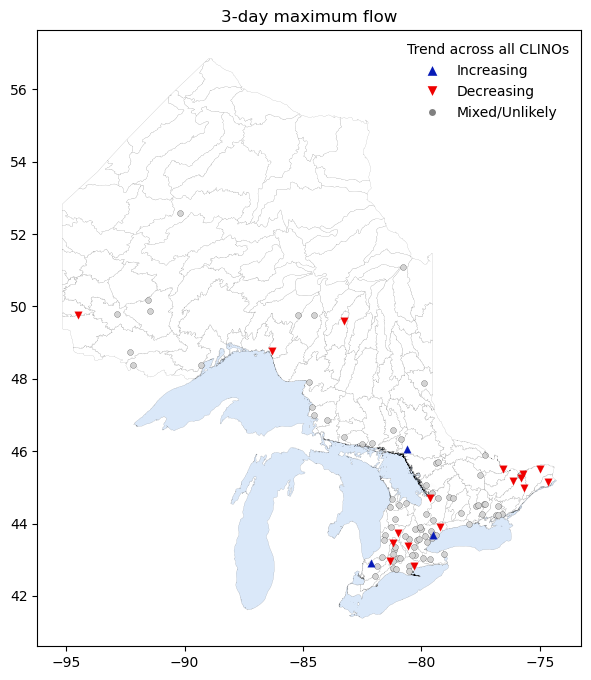

In [3]:
# Example of calling the function
file_paths = [
    r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1970_2000\allSOBRplot\MKnP_3daymaxflow.csv",
    r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1980_2010\allSOBRplot\MKnP_3daymaxflow.csv",
    r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1990_2020\allSOBRplot\MKnP_3daymaxflow.csv",
    r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1970_2020\allSOBRplot\MKnP_3daymaxflow.csv"
]

sobr_file_path = r'C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\ResultTable\SOBRstations1rNnew.csv'
shapefile_path = r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\provincial Boundary\SOBR_on84.shp"

# Call the function
merged_df, fig, ax = plot_and_merge_data(file_paths, sobr_file_path, shapefile_path,title='3-day maximum flow')
fig.savefig(r'C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\Conclusion plot\03_day_maximum_flow.png', 
            dpi=300, bbox_inches='tight')

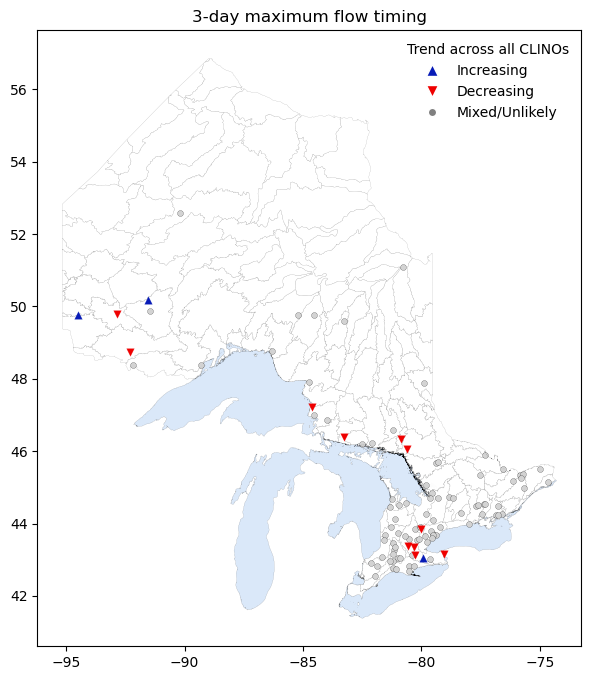

In [4]:
# 3 Day Max flow Time
file_paths = [
    r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1970_2000\allSOBRplot\MKnP_3daymaxflowTime.csv",
    r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1980_2010\allSOBRplot\MKnP_3daymaxflowTime.csv",
    r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1990_2020\allSOBRplot\MKnP_3daymaxflowTime.csv",
    r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1970_2020\allSOBRplot\MKnP_3daymaxflowTime.csv"
]

result_dfs = [load_data(file_path) for file_path in file_paths]
result_df70, result_df80, result_df90, result_df2020 = result_dfs
# Call the function
merged_df, fig, ax = plot_and_merge_data(file_paths, sobr_file_path, shapefile_path,title='3-day maximum flow timing')
fig.savefig(r'C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\Conclusion plot\03_day_maximum_flow time.png', 
            dpi=300, bbox_inches='tight')

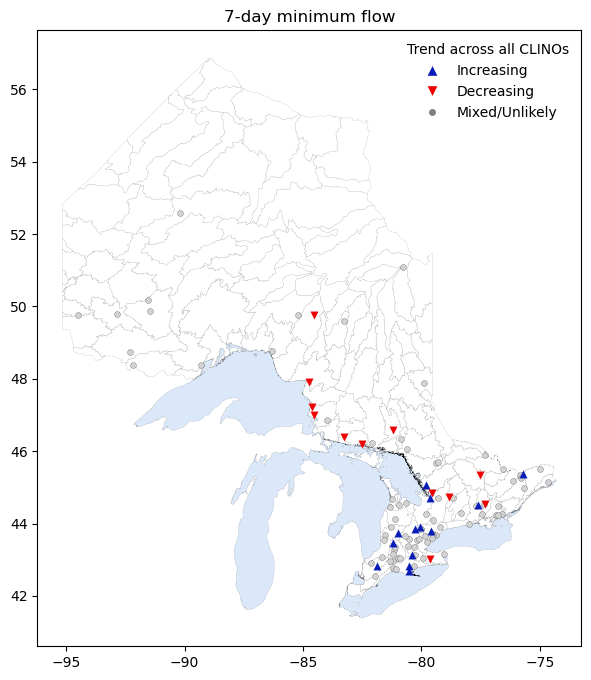

In [5]:
# 7 Day Flow
file_paths = [
    r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1970_2000\allSOBRplot\MKnP_7dayminflow.csv",
    r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1980_2010\allSOBRplot\MKnP_7dayminflow.csv",
    r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1990_2020\allSOBRplot\MKnP_7dayminflow.csv",
    r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1970_2020\allSOBRplot\MKnP_7dayminflow.csv"
]

result_dfs = [load_data(file_path) for file_path in file_paths]
result_df70, result_df80, result_df90, result_df2020 = result_dfs
# Call the function
merged_df, fig, ax = plot_and_merge_data(file_paths, sobr_file_path, shapefile_path,title='7-day minimum flow')
fig.savefig(r'C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\Conclusion plot\07_day_minimum_flow.png', 
            dpi=300, bbox_inches='tight')

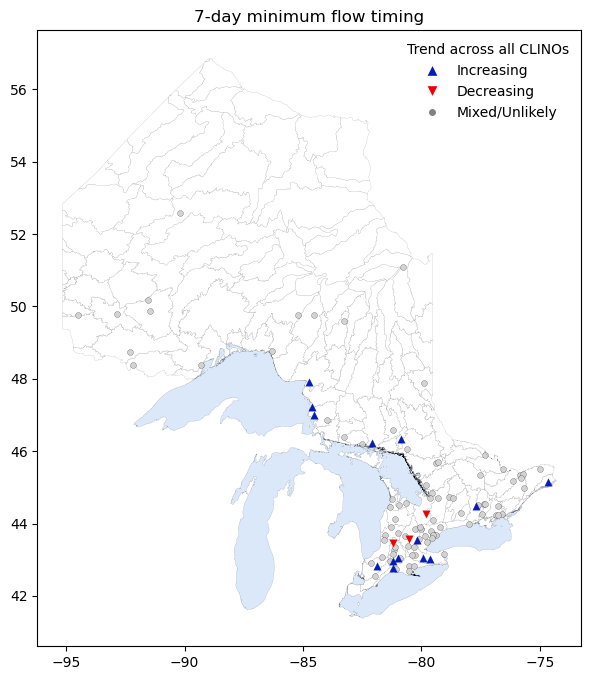

In [6]:
# 7 Day Flow Time
file_paths = [
    r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1970_2000\allSOBRplot\MKnP_7dayminflowTime.csv",
    r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1980_2010\allSOBRplot\MKnP_7dayminflowTime.csv",
    r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1990_2020\allSOBRplot\MKnP_7dayminflowTime.csv",
    r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1970_2020\allSOBRplot\MKnP_7dayminflowTime.csv"
]

result_dfs = [load_data(file_path) for file_path in file_paths]
result_df70, result_df80, result_df90, result_df2020 = result_dfs
# Call the function
merged_df, fig, ax = plot_and_merge_data(file_paths, sobr_file_path, shapefile_path,title='7-day minimum flow timing')
fig.savefig(r'C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\Conclusion plot\07-day minimum flow timing.png', 
            dpi=300, bbox_inches='tight')

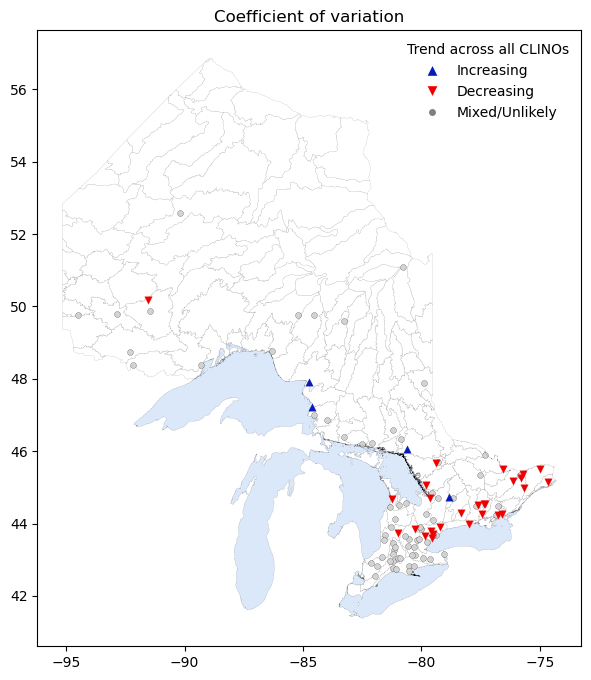

In [7]:
# ACV
file_paths = [
    r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1970_2000\allSOBRplot\MKnP_ACV.csv",
    r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1980_2010\allSOBRplot\MKnP_ACV.csv",
    r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1990_2020\allSOBRplot\MKnP_ACV.csv",
    r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1970_2020\allSOBRplot\MKnP_ACV.csv"
]

result_dfs = [load_data(file_path) for file_path in file_paths]
result_df70, result_df80, result_df90, result_df2020 = result_dfs
# Call the function
merged_df, fig, ax = plot_and_merge_data(file_paths, sobr_file_path, shapefile_path,title='Coefficient of variation')
fig.savefig(r'C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\Conclusion plot\0ACV.png', 
            dpi=300, bbox_inches='tight')


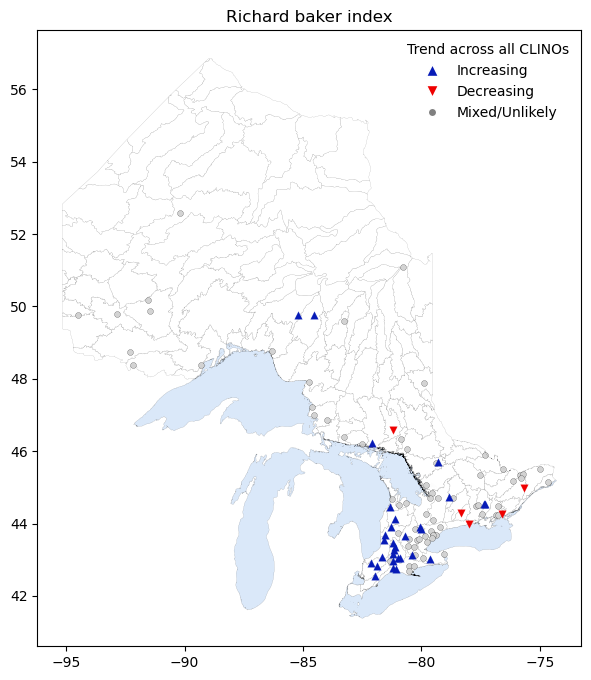

In [8]:
# RBI
file_paths = [
    r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1970_2000\allSOBRplot\MKnP_RBI.csv",
    r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1980_2010\allSOBRplot\MKnP_RBI.csv",
    r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1990_2020\allSOBRplot\MKnP_RBI.csv",
    r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1970_2020\allSOBRplot\MKnP_RBI.csv"
]

result_dfs = [load_data(file_path) for file_path in file_paths]
result_df70, result_df80, result_df90, result_df2020 = result_dfs
# Call the function
merged_df, fig, ax = plot_and_merge_data(file_paths, sobr_file_path, shapefile_path,title='Richard baker index')
fig.savefig(r'C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\Conclusion plot\0RBI.png', 
            dpi=300, bbox_inches='tight')

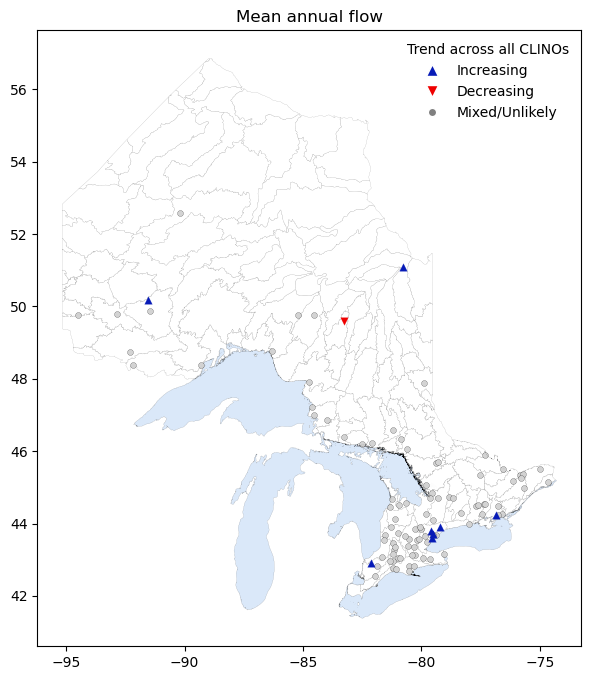

In [9]:
# MAD
file_paths = [
    r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1970_2000\allSOBRplot\MKnP_MeanAnnualD.csv",
    r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1980_2010\allSOBRplot\MKnP_MeanAnnualD.csv",
    r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1990_2020\allSOBRplot\MKnP_MeanAnnualD.csv",
    r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1970_2020\allSOBRplot\MKnP_MeanAnnualD.csv"
]

result_dfs = [load_data(file_path) for file_path in file_paths]
result_df70, result_df80, result_df90, result_df2020 = result_dfs
# Call the function
merged_df, fig, ax = plot_and_merge_data(file_paths, sobr_file_path, shapefile_path,title='Mean annual flow')
fig.savefig(r'C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\Conclusion plot\0MAF.png', 
            dpi=300, bbox_inches='tight')

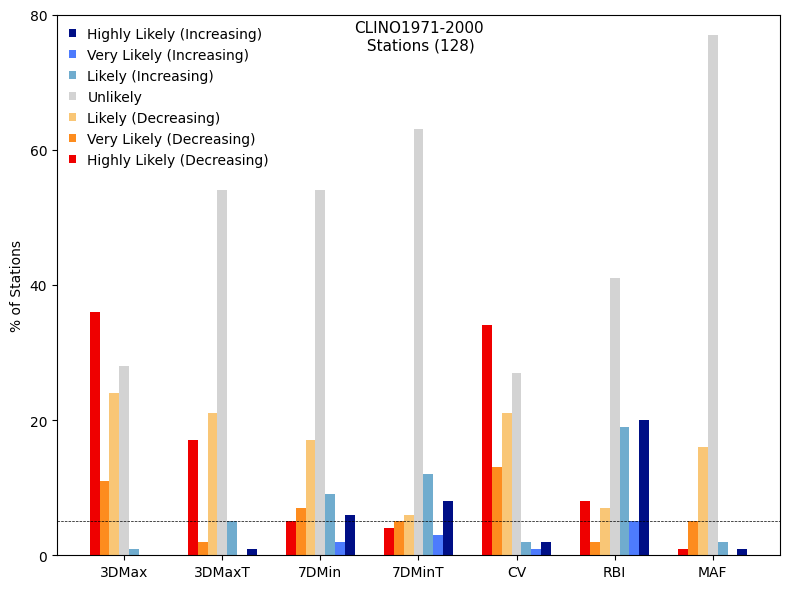

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#read csv file from folder
data = r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\ResultTable\Bar Chart\clino71.csv"
df= pd.read_csv(data,sep='\t')
# print(df)

color1 = '#FFFFFF'  
color2 = '#F9C676'
color3 = '#FD8C1E'
color4 = '#EF0000'
color5 = '#70ACCE'
color6 = '#4D7BFD'
color7 = '#000F86'

# Metrics and categories
metrics = ["3DMax", "3DMaxT", "7DMin", "7DMinT", "CV", "RBI", "MAF"]
categories = df["CLINO1971"]

# Define colors matching the provided plot
colors = [color4,color3,color2,'lightgrey',color5,color6,color7]
# Initialize plot
x = np.arange(len(metrics))  # x-axis positions
bar_width = 0.1  # Width of each bar

fig, ax = plt.subplots(figsize=(8, 6))

# Plot data with specific colors
for i, (category, color) in enumerate(zip(categories, colors)):
    values = df.iloc[i, 1:].values  # Get metric values for each category
    ax.bar(x + i * bar_width, values, bar_width, label=category, color=color)

# Customize the plot
# ax.set_xlabel("Indicators")
ax.set_ylabel("% of Stations")
ax.set_ylim(0, 80)
# ax.set_title("CLINO1971-2000")
ax.set_xticks(x + bar_width * (len(categories) / 2 - 0.5))
ax.set_xticklabels(metrics, rotation=0, ha="center")
# ax.legend(title="Likelihood Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
# ax.legend(frameon=False,fontsize=7)
# ax.legend(frameon=False, fontsize=7, handleheight=0.5, handlelength=0.5)

# Get handles and labels from the legend
handles, labels = ax.get_legend_handles_labels()

# Reverse the order of handles and labels
# ax.legend(handles[::-1], labels[::-1], frameon=False, fontsize=6, handleheight=0.5, handlelength=0.5,title="CLINO1971-2000\n stations (128)",loc='upper left')
legend = ax.legend(handles[::-1], labels[::-1], frameon=False, fontsize=10, handleheight=0.5, handlelength=0.5, loc='upper left')
ax.text(0.5, 0.96, "CLINO1971-2000\n Stations (128)",fontsize=11, ha='center', va='center', transform=ax.transAxes)


# legend.set_title("CLINO1971-2000\n Stations (128)", prop={"size": 11})

# legend = ax.legend([], [], frameon=False)
# legend.set_title("CLINO1971-2000\n Stations (128)", prop={"size": 11})


# ax.set_title("CLINO1971-2000\nStations (128)", fontsize=10, ha='center')
# legend.set_title("CLINO1971-2000", prop={"size": 10},ha='center')  # Title with larger font
# legend.get_title().set_text("CLINO1971-2000\n Stations (128)")  # Add subtitle with smaller font size


ax.set_yticks([0, 20, 40, 60, 80])  # Set custom y-ticks
ax.axhline(y=5, color='black', linestyle='--', linewidth=0.5)  # Add horizontal line at 5%


plt.tight_layout()
plt.show()
fig.savefig(r'C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\ResultTable\Bar Chart\clino71.png', 
            dpi=600, bbox_inches='tight')

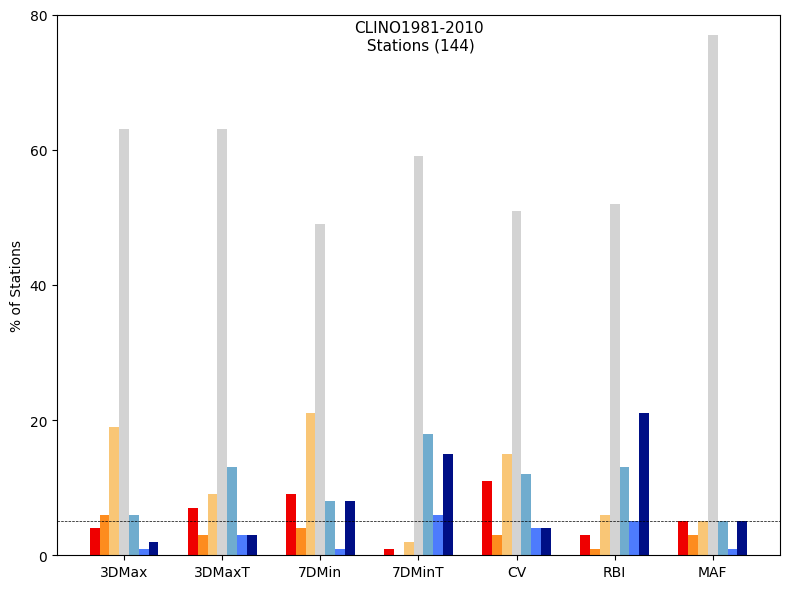

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#read csv file from folder
data = r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\ResultTable\Bar Chart\clino81.csv"
df= pd.read_csv(data,sep='\t')
# print(df)

color1 = '#FFFFFF'  
color2 = '#F9C676'
color3 = '#FD8C1E'
color4 = '#EF0000'
color5 = '#70ACCE'
color6 = '#4D7BFD'
color7 = '#000F86'

# Metrics and categories
metrics = ["3DMax", "3DMaxT", "7DMin", "7DMinT", "CV", "RBI", "MAF"]
categories = df["CLINO1981"]

# Define colors matching the provided plot
colors = [color4,color3,color2,'lightgrey',color5,color6,color7]
# Initialize plot
x = np.arange(len(metrics))  # x-axis positions
bar_width = 0.1  # Width of each bar

fig, ax = plt.subplots(figsize=(8, 6))

# Plot data with specific colors
for i, (category, color) in enumerate(zip(categories, colors)):
    values = df.iloc[i, 1:].values  # Get metric values for each category
    ax.bar(x + i * bar_width, values, bar_width, label=category, color=color)

# Customize the plot
# ax.set_xlabel("Indicators")
ax.set_ylabel("% of Stations")
ax.set_ylim(0, 80)
# ax.set_title("CLINO1971-2000")
ax.set_xticks(x + bar_width * (len(categories) / 2 - 0.5))
ax.set_xticklabels(metrics, rotation=0, ha="center")
ax.text(0.5, 0.96, "CLINO1981-2010\n Stations (144)",fontsize=11, ha='center', va='center', transform=ax.transAxes)

# legend = ax.legend([], [], frameon=False)
# legend.set_title("CLINO1981-2010\n Stations (144)", prop={"size": 11})


# ax.legend(title="Likelihood Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
# ax.legend(frameon=False,fontsize=7)
# ax.legend(frameon=False, fontsize=7, handleheight=0.5, handlelength=0.5)

# Get handles and labels from the legend
# handles, labels = ax.get_legend_handles_labels()

# Reverse the order of handles and labels
# # ax.legend(handles[::-1], labels[::-1], frameon=False, fontsize=6, handleheight=0.5, handlelength=0.5,title="CLINO1981-2010",loc='upper left')
# legend = ax.legend(handles[::-1], labels[::-1], frameon=False, fontsize=6, handleheight=0.5, handlelength=0.5, loc='upper left')
# legend.set_title("CLINO1981-2010", prop={"size": 8})  # Title with larger font
# legend.get_title().set_text("CLINO1981-2010\n Stations (144)")  # Add subtitle with smaller font size

ax.set_yticks([0, 20, 40, 60, 80])  # Set custom y-ticks
ax.axhline(y=5, color='black', linestyle='--', linewidth=0.5)  # Add horizontal line at 5%


plt.tight_layout()
plt.show()
fig.savefig(r'C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\ResultTable\Bar Chart\clino81.png', 
            dpi=600, bbox_inches='tight')

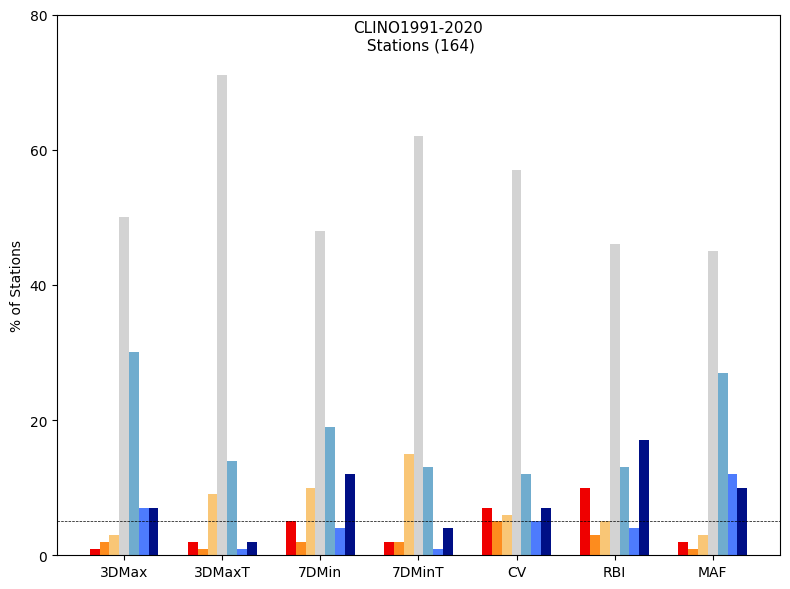

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#read csv file from folder
data = r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\ResultTable\Bar Chart\clino91.csv"
df= pd.read_csv(data,sep='\t')
# print(df)

color1 = '#FFFFFF'  
color2 = '#F9C676'
color3 = '#FD8C1E'
color4 = '#EF0000'
color5 = '#70ACCE'
color6 = '#4D7BFD'
color7 = '#000F86'

# Metrics and categories
metrics = ["3DMax", "3DMaxT", "7DMin", "7DMinT", "CV", "RBI", "MAF"]
categories = df["CLINO1991"]

# Define colors matching the provided plot
colors = [color4,color3,color2,'lightgrey',color5,color6,color7]
# Initialize plot
x = np.arange(len(metrics))  # x-axis positions
bar_width = 0.1  # Width of each bar

fig, ax = plt.subplots(figsize=(8, 6))

# Plot data with specific colors
for i, (category, color) in enumerate(zip(categories, colors)):
    values = df.iloc[i, 1:].values  # Get metric values for each category
    ax.bar(x + i * bar_width, values, bar_width, label=category, color=color)

# Customize the plot
# ax.set_xlabel("Indicators")
ax.set_ylabel("% of Stations")
ax.set_ylim(0, 80)
# ax.set_title("CLINO1971-2000")
ax.set_xticks(x + bar_width * (len(categories) / 2 - 0.5))
ax.set_xticklabels(metrics, rotation=0, ha="center")
ax.text(0.5, 0.96, "CLINO1991-2020\n Stations (164)",fontsize=11, ha='center', va='center', transform=ax.transAxes)


# legend = ax.legend([], [], frameon=False,loc='upper left')
# legend.set_title("CLINO1991-2020\n Stations (164)", prop={"size": 11})

# ax.legend(title="Likelihood Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
# ax.legend(frameon=False,fontsize=7)
# ax.legend(frameon=False, fontsize=7, handleheight=0.5, handlelength=0.5)

# # Get handles and labels from the legend
# handles, labels = ax.get_legend_handles_labels()

# # Reverse the order of handles and labels
# # ax.legend(handles[::-1], labels[::-1], frameon=False, fontsize=6, handleheight=0.5, handlelength=0.5,title="CLINO1991-2020",loc='upper left')
# legend = ax.legend(handles[::-1], labels[::-1], frameon=False, fontsize=6, handleheight=0.5, handlelength=0.5, loc='upper left')
# legend.set_title("CLINO1991-2020", prop={"size": 8})  # Title with larger font
# legend.get_title().set_text("CLINO1991-2020\n stations (164)")  # Add subtitle with smaller font size

ax.set_yticks([0, 20, 40, 60, 80])  # Set custom y-ticks
ax.axhline(y=5, color='black', linestyle='--', linewidth=0.5)  # Add horizontal line at 5%


plt.tight_layout()
plt.show()
fig.savefig(r'C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\ResultTable\Bar Chart\clino91.png', 
            dpi=600, bbox_inches='tight')

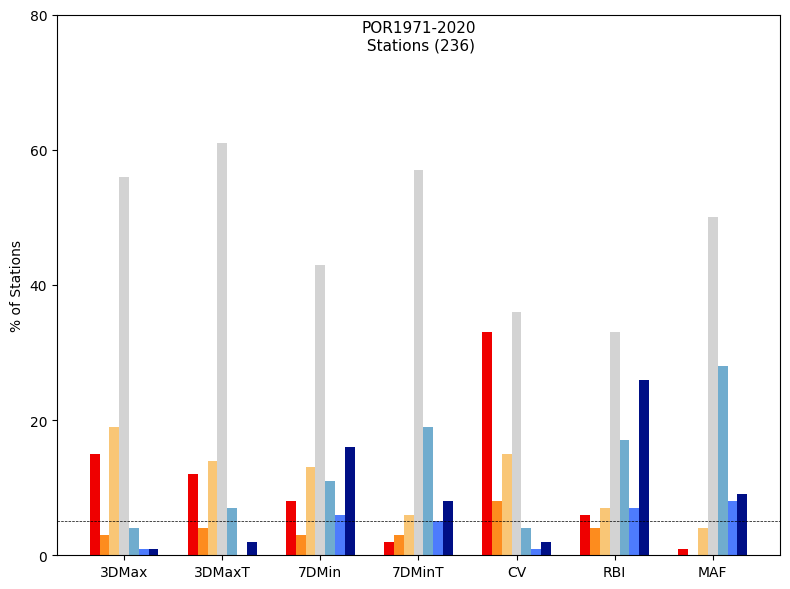

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#read csv file from folder
data = r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\ResultTable\Bar Chart\por.csv"
df= pd.read_csv(data,sep='\t')
# print(df)

color1 = '#FFFFFF'  
color2 = '#F9C676'
color3 = '#FD8C1E'
color4 = '#EF0000'
color5 = '#70ACCE'
color6 = '#4D7BFD'
color7 = '#000F86'

# Metrics and categories
metrics = ["3DMax", "3DMaxT", "7DMin", "7DMinT", "CV", "RBI", "MAF"]
categories = df["POR2020"]

# Define colors matching the provided plot
colors = [color4,color3,color2,'lightgrey',color5,color6,color7]
# Initialize plot
x = np.arange(len(metrics))  # x-axis positions
bar_width = 0.1  # Width of each bar

fig, ax = plt.subplots(figsize=(8, 6))

# Plot data with specific colors
for i, (category, color) in enumerate(zip(categories, colors)):
    values = df.iloc[i, 1:].values  # Get metric values for each category
    ax.bar(x + i * bar_width, values, bar_width, label=category, color=color)

# Customize the plot
# ax.set_xlabel("Indicators")
ax.set_ylabel("% of Stations")
ax.set_ylim(0, 80)
# ax.set_title("CLINO1971-2000")
ax.set_xticks(x + bar_width * (len(categories) / 2 - 0.5))
ax.set_xticklabels(metrics, rotation=0, ha="center")
ax.text(0.5, 0.96, "POR1971-2020\n Stations (236)",fontsize=11, ha='center', va='center', transform=ax.transAxes)


# legend = ax.legend([], [], frameon=False,loc='upper left')
# legend.set_title("POR1971-2020\n Stations (236)", prop={"size": 11})

# ax.legend(title="Likelihood Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
# ax.legend(frameon=False,fontsize=7)
# ax.legend(frameon=False, fontsize=7, handleheight=0.5, handlelength=0.5)

# # Get handles and labels from the legend
# handles, labels = ax.get_legend_handles_labels()

# # Reverse the order of handles and labels
# # ax.legend(handles[::-1], labels[::-1], frameon=False, fontsize=6, handleheight=0.5, handlelength=0.5,title="POR1971-2020",loc='upper left')
# legend = ax.legend(handles[::-1], labels[::-1], frameon=False, fontsize=6, handleheight=0.5, handlelength=0.5, loc='upper left')
# legend.set_title("POR1971-2020", prop={"size": 8})  # Title with larger font
# legend.get_title().set_text("POR1971-2020\n stations (236)")  # Add subtitle with smaller font size

ax.set_yticks([0, 20, 40, 60, 80])  # Set custom y-ticks
ax.axhline(y=5, color='black', linestyle='--', linewidth=0.5)  # Add horizontal line at 5%


plt.tight_layout()
plt.show()
fig.savefig(r'C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\ResultTable\Bar Chart\POR.png', 
            dpi=600, bbox_inches='tight')